# Boosting

In this notebook, we are going to test several classifiers like **gradient boosting**, **adaboost** and **voting classifier**.

In [1]:
from Functions.Common_functions import *
import pandas as pd

### Load data

In [2]:
dataset_df = formate_dataset(normalizer=True)
dataset_df.head()

Relative Compactness Surface area  Wall area Roof area Overall height  \
0              2.06355     -1.59779  -0.269786  -1.42786              1   
1               2.0694     -1.71823  -0.422547  -1.47112              1   
2              2.03073     -1.75999  -0.340612  -1.55169              1   
3              2.01447     -1.72899  -0.581134  -1.40454              1   
4              1.30869     -1.34281 -0.0477237  -1.28699              1   

  Glazing area GAD : 0 GAD : 1 GAD : 2 GAD : 3 GAD : 4 GAD : 5 East North  \
0     -1.64028       1       0       0       0       0       0    0     1   
1     -1.83179       1       0       0       0       0       0    1     0   
2     -1.76649       1       0       0       0       0       0    0     0   
3     -1.76117       1       0       0       0       0       0    0     0   
4     -1.81079       1       0       0       0       0       0    0     1   

  South West   Energy Energy efficiency  
0     0    0  34.2639                 B  
1     0    0  34.5898                 B  
2     1    0   38.778                 C  
3     0    1  37.9478                 C  
4     0    0  47.6759                 D

### Create test set

In [3]:
from sklearn.model_selection import train_test_split, cross_val_predict
X_train, X_test, y_train_r, y_test_r = train_test_split(dataset_df[dataset_df.columns[0:16]], dataset_df['Energy'], test_size=0.20, random_state=42)
_, _, y_train_b, y_test_b = train_test_split(dataset_df[dataset_df.columns[0:16]], dataset_df['Energy efficiency'], test_size=0.20, random_state=42) 

#  GradientBoosting Classifier


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

gbc = GradientBoostingClassifier().fit(X_train, y_train_b) 

np.mean(cross_val_score(estimator=gbc, X=X_train, y=y_train_b, cv=3))

0.5748525426430735

### Learning rate parameter

In [85]:
def plot_f1_scores(train_results, test_results, parameter, parameter_name):
    line1, = plt.plot(parameter, train_results, 'b', label='Train f1 score')
    line2, = plt.plot(parameter, test_results, 'r', label='Validation f1 score')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('f1_score')
    plt.xlabel(parameter_name)
    plt.show()  

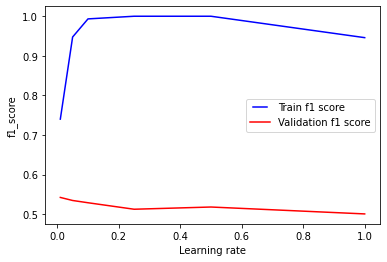

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import numpy as np

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_results = []
test_results = []

for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train_b)
    
    train_pred = model.predict(X_train)   
    f1_score_train = f1_score(y_train_b, train_pred, average='macro')
    train_results.append(f1_score_train)  
    
    valid_pred = cross_val_predict(X=X_train, y=y_train_b, estimator=model, cv=5)   
    f1_score_valid= f1_score(y_train_b, valid_pred, average='macro')
    test_results.append(f1_score_valid)
    
plot_f1_scores(train_results, test_results, parameter=learning_rates, parameter_name='Learning rate')

We can observe on this graphic that the model overfitting with the growth of the learning rate. The optimal learning rate is smaller than 0.1.

### N estimator

In [90]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results = []
test_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator, learning_rate=0.1)
    model.fit(X_train, y_train_b)
    
    train_pred = model.predict(X_train)   
    f1_score_train = f1_score(y_train_b, train_pred, average='macro')
    train_results.append(f1_score_train)  
    
    valid_pred = cross_val_predict(X=X_train, y=y_train_b, estimator=model, cv=5)   
    f1_score_valid= f1_score(y_train_b, valid_pred, average='macro')
    test_results.append(f1_score_valid)

plot_f1_scores(train_results, test_results, parameter=n_estimators, parameter_name='Number estimators')

n_estimators represents the number of trees in the forest. The optimal n_estimator is between 10 and 40.

### Max depth

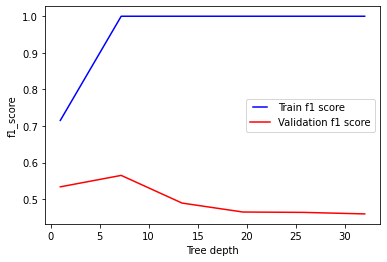

In [28]:
max_depths = np.linspace(1, 32, 6, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(X_train, y_train_b)
    
    train_pred = model.predict(X_train)   
    f1_score_train = f1_score(y_train_b, train_pred, average='macro')
    train_results.append(f1_score_train)  
    
    valid_pred = cross_val_predict(X=X_train, y=y_train_b, estimator=model, cv=5)   
    f1_score_valid= f1_score(y_train_b, valid_pred, average='macro')
    test_results.append(f1_score_valid)
    
plot_f1_scores(train_results, test_results, parameter=max_depths, parameter_name='Tree depth')

### Max features

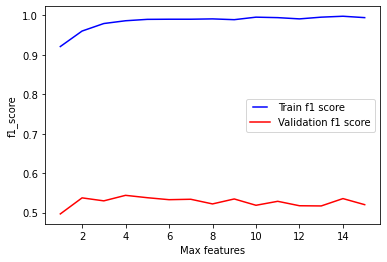

In [29]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features=max_feature)
    model.fit(X_train, y_train_b)   
    
    train_pred = model.predict(X_train) 
    f1_score_train = f1_score(y_train_b, train_pred, average='macro')
    train_results.append(f1_score_train)  
    
    valid_pred = cross_val_predict(X=X_train, y=y_train_b, estimator=model, cv=5)   
    f1_score_valid= f1_score(y_train_b, valid_pred, average='macro')
    test_results.append(f1_score_valid)
    
plot_f1_scores(train_results, test_results, parameter=max_features, parameter_name='Max features')

Max features parameter is optimal between 3 and 6.

### Min samples leaf

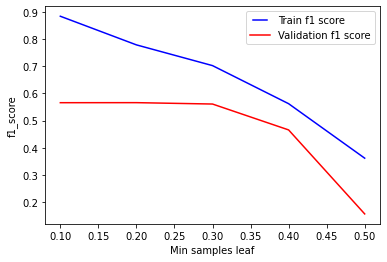

In [32]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train_b)
    
    train_pred = model.predict(X_train)
    f1_score_train = f1_score(y_train_b, train_pred, average='macro')
    train_results.append(f1_score_train)  
    
    valid_pred = cross_val_predict(X=X_train, y=y_train_b, estimator=model, cv=5)   
    f1_score_valid= f1_score(y_train_b, valid_pred, average='macro')
    test_results.append(f1_score_valid)
    
plot_f1_scores(train_results, test_results, parameter=min_samples_leafs, parameter_name='Min samples leaf')

### Create the classifier

In [37]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()
params = {'learning_rate':list(np.linspace(0.01, 0.3, 5)),
          'n_estimators':list(np.arange(10,40, 6)), 
          'max_features':list(np.arange(3,10)),
          'max_depth': list(np.arange(1,10, 5)),
          'min_samples_leaf': list(np.linspace(0.05, 0.35, 5))
         }

grid = GridSearchCV(estimator=model,
                    param_grid=params,
                   scoring='f1_macro')

grid.fit(X_train, y_train_b)
grid.best_params_

{'learning_rate': 0.155,
 'max_depth': 6,
 'max_features': 9,
 'min_samples_leaf': 0.125,
 'n_estimators': 28}

In [40]:
import pickle

filename = 'Models/sgb.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [93]:
from sklearn.model_selection import cross_val_score

loaded_model = pickle.load(open(filename, 'rb'))
np.mean(cross_val_score(loaded_model, X_test, y_test_b))

0.5580645161290322

## Adaboost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

# Decision Tree Regressor by default
abc = AdaBoostClassifier(n_estimators=50)

model = abc.fit(X_train, y_train_b)

In [51]:
abc.score(X_test, y_test_b)

0.2987012987012987

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


abc = AdaBoostClassifier()

grid = GridSearchCV(estimator = abc,
                   param_grid={'algorithm':['SAMME', 'SAMME.R'],
                               'n_estimators':np.arange(1,50,10),
                               'learning_rate': np.arange(0.000001, 1, 10)},
                   cv=3,
                   scoring='f1_macro')

grid.fit(X_train, y_train_b)
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1e-06, n_estimators=1)

In [84]:
from sklearn.model_selection import cross_val_score

cross_val_score(grid.best_estimator_, X_train, y_train_b, cv=3)

array([0.41463415, 0.4097561 , 0.41176471])

Adaboost is not performant in our dataset. We know that this model is very sensitive too noisy data and outliers. Therefore, this model is not adapted for this case. We are going to keep gradient boosting classifier to do the test.

## Test

In [99]:
from sklearn.metrics import classification_report

gbc = loaded_model
y_test_pred = gbc.predict(X_test)
print(classification_report(y_test_b, y_test_pred, digits=3))

              precision    recall  f1-score   support

           A      0.756     0.872     0.810        39
           B      0.235     0.286     0.258        14
           C      0.900     0.409     0.563        22
           D      0.692     0.643     0.667        14
           E      0.552     0.640     0.593        25
           F      0.500     0.542     0.520        24
           G      0.714     0.625     0.667        16

    accuracy                          0.617       154
   macro avg      0.621     0.574     0.582       154
weighted avg      0.646     0.617     0.616       154



It is obvious that the classifier is in difficulty to predict the class "B".

In [100]:
gbc.score(X_test, y_test_b)

0.6493506493506493

## Errors analyse

In [101]:
from Functions.Classification_Functions import *

conf_mx = compute_conf_matrix(gbc, X_test, y_test_b)

<Figure size 360x360 with 0 Axes>

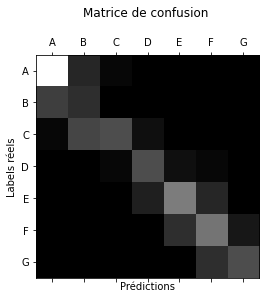

In [102]:
display_conf_matrix(conf_mx)

The model classfies well the A and F classes.

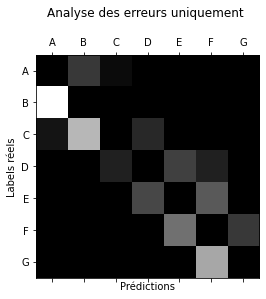

In [103]:
plot_error_analysis(conf_mx)

This model is laboring to classify well the B class. We can remark that this classifier is close to have very good results because the misclassified samples are almost always classify in the nearest class.